In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
fd_002 = pd.read_csv("/content/drive/MyDrive/ComputaciónAplicada/CMAPSS/train_FD002.txt",sep=" ",header=None)

In [6]:
fd_002

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,NaN,NaN
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,NaN,NaN
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,NaN,NaN
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,NaN,NaN


In [7]:
fd_002.drop(columns=[26,27],inplace=True)

In [8]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf','Nc','epr','Ps30','phi','NRf','NRc','BPR','farB', 'htBleed','Nfdmd','PCNfR_dmd','W31','W32']

In [9]:
fd_002.columns = columns

In [10]:
fd_002

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nfdmd,PCNfR_dmd,W31,W32
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [11]:
def prepare_train_data(data, factor = 0):
# Hacer una copia del DataFrame original para evitar cambios en el DataFrame original
 df = data.copy()

# Agrupar por 'unit_number' y encontrar el máximo 'time_in_cycles' para cada grupo
# reset_index() se usa para convertir 'unit_number' de un índice a una columna
 fd_RUL = df.groupby('unit_number')['time_in_cycles'].max().reset_index()

# Cambiar el nombre de la columna 'time_in_cycles' a 'max'
 fd_RUL.rename(columns = {'time_in_cycles':'max'}, inplace = True)

# Combinar el DataFrame original con fd_RUL basado en 'unit_number'
# Esto agrega la columna 'max' al DataFrame original
 df = df.merge(fd_RUL, on=['unit_number'], how='left')

# Calcular la columna 'RUL' como la diferencia entre 'max' y 'time_in_cycles'
 df['RUL'] = df['max'] - df['time_in_cycles']

# Eliminar la columna 'max' ya que ya no es necesaria
 df.drop(columns=['max'],inplace = True)

# Devolver solo las filas donde 'time_in_cycles' es mayor que el factor dado
 return df[df['time_in_cycles'] > factor]

In [12]:
df = prepare_train_data(fd_002)

In [13]:
df

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nfdmd,PCNfR_dmd,W31,W32,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,148
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,147
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,146
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,145
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,4
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,3
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,2
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,1


Text(0, 0.5, 'Cantidad de puntos')

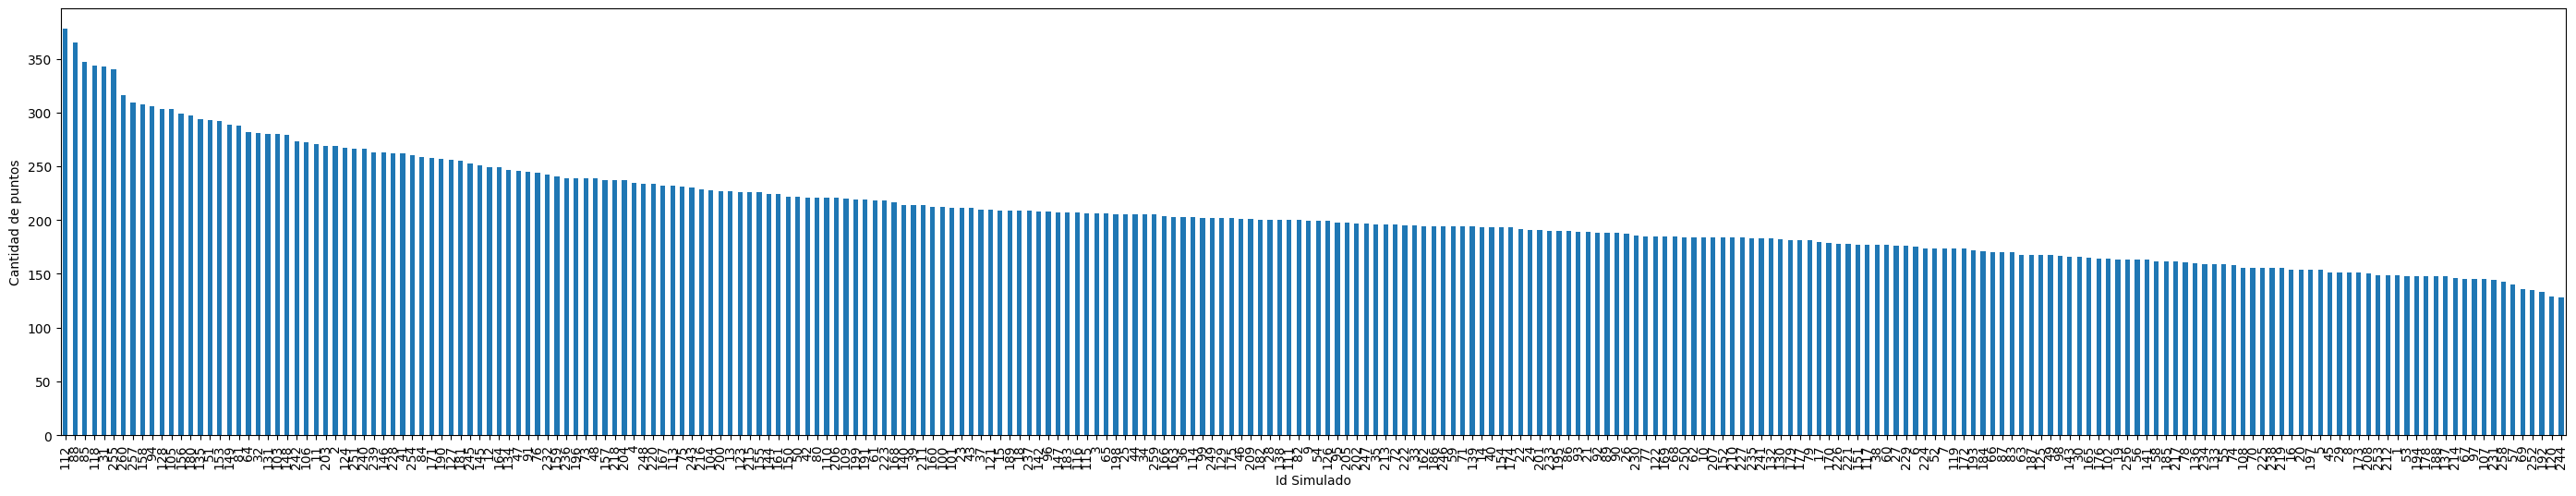

In [14]:
#Veamos cada campaña

plt.figure(figsize=(35,6))
df.unit_number.value_counts().plot.bar()
plt.xlabel('Id Simulado')
plt.ylabel('Cantidad de puntos')

In [15]:
 # Definimos la variable dependiente que queremos analizar. En este caso, 'RUL' (Remaining Useful Life).
dependent_var = ['RUL']

# Creamos un gráfico de dispersión (scatter plot) utilizando PairGrid de seaborn.
# Se filtran los datos para considerar solo las unidades con 'unit_number' menor a 100.
# Los gráficos de dispersión se crearán para cada variable (columnas) en el DataFrame 'df', utilizando 'RUL' como la variable en el eje x.
 g = sns.PairGrid(data=df.query('unit_number < 100'),

             # Filtramos los datos para unidades menores a 100
            x_vars=dependent_var, # Variable independiente 'RUL'
            y_vars=df.columns, # Columnas del DataFrame a comparar contra 'RUL'
            hue="unit_number", # Coloreamos los puntos según el 'unit_number'
            height=2, # Altura de cada gráfico
            aspect=5) # Relación de aspecto para los gráficos

# Utilizamos la función map para dibujar gráficos de dispersión en la cuadrícula (PairGrid).
 g = g.map(plt.scatter)

# Ajustamos los límites del eje x, invirtiendo la dirección del eje para mostrar de 60 a 0.
 g = g.set(xlim=(60, 0))

# Agregamos una leyenda para diferenciar las distintas unidades por color.
 g = g.add_legend()

Output hidden; open in https://colab.research.google.com to view.

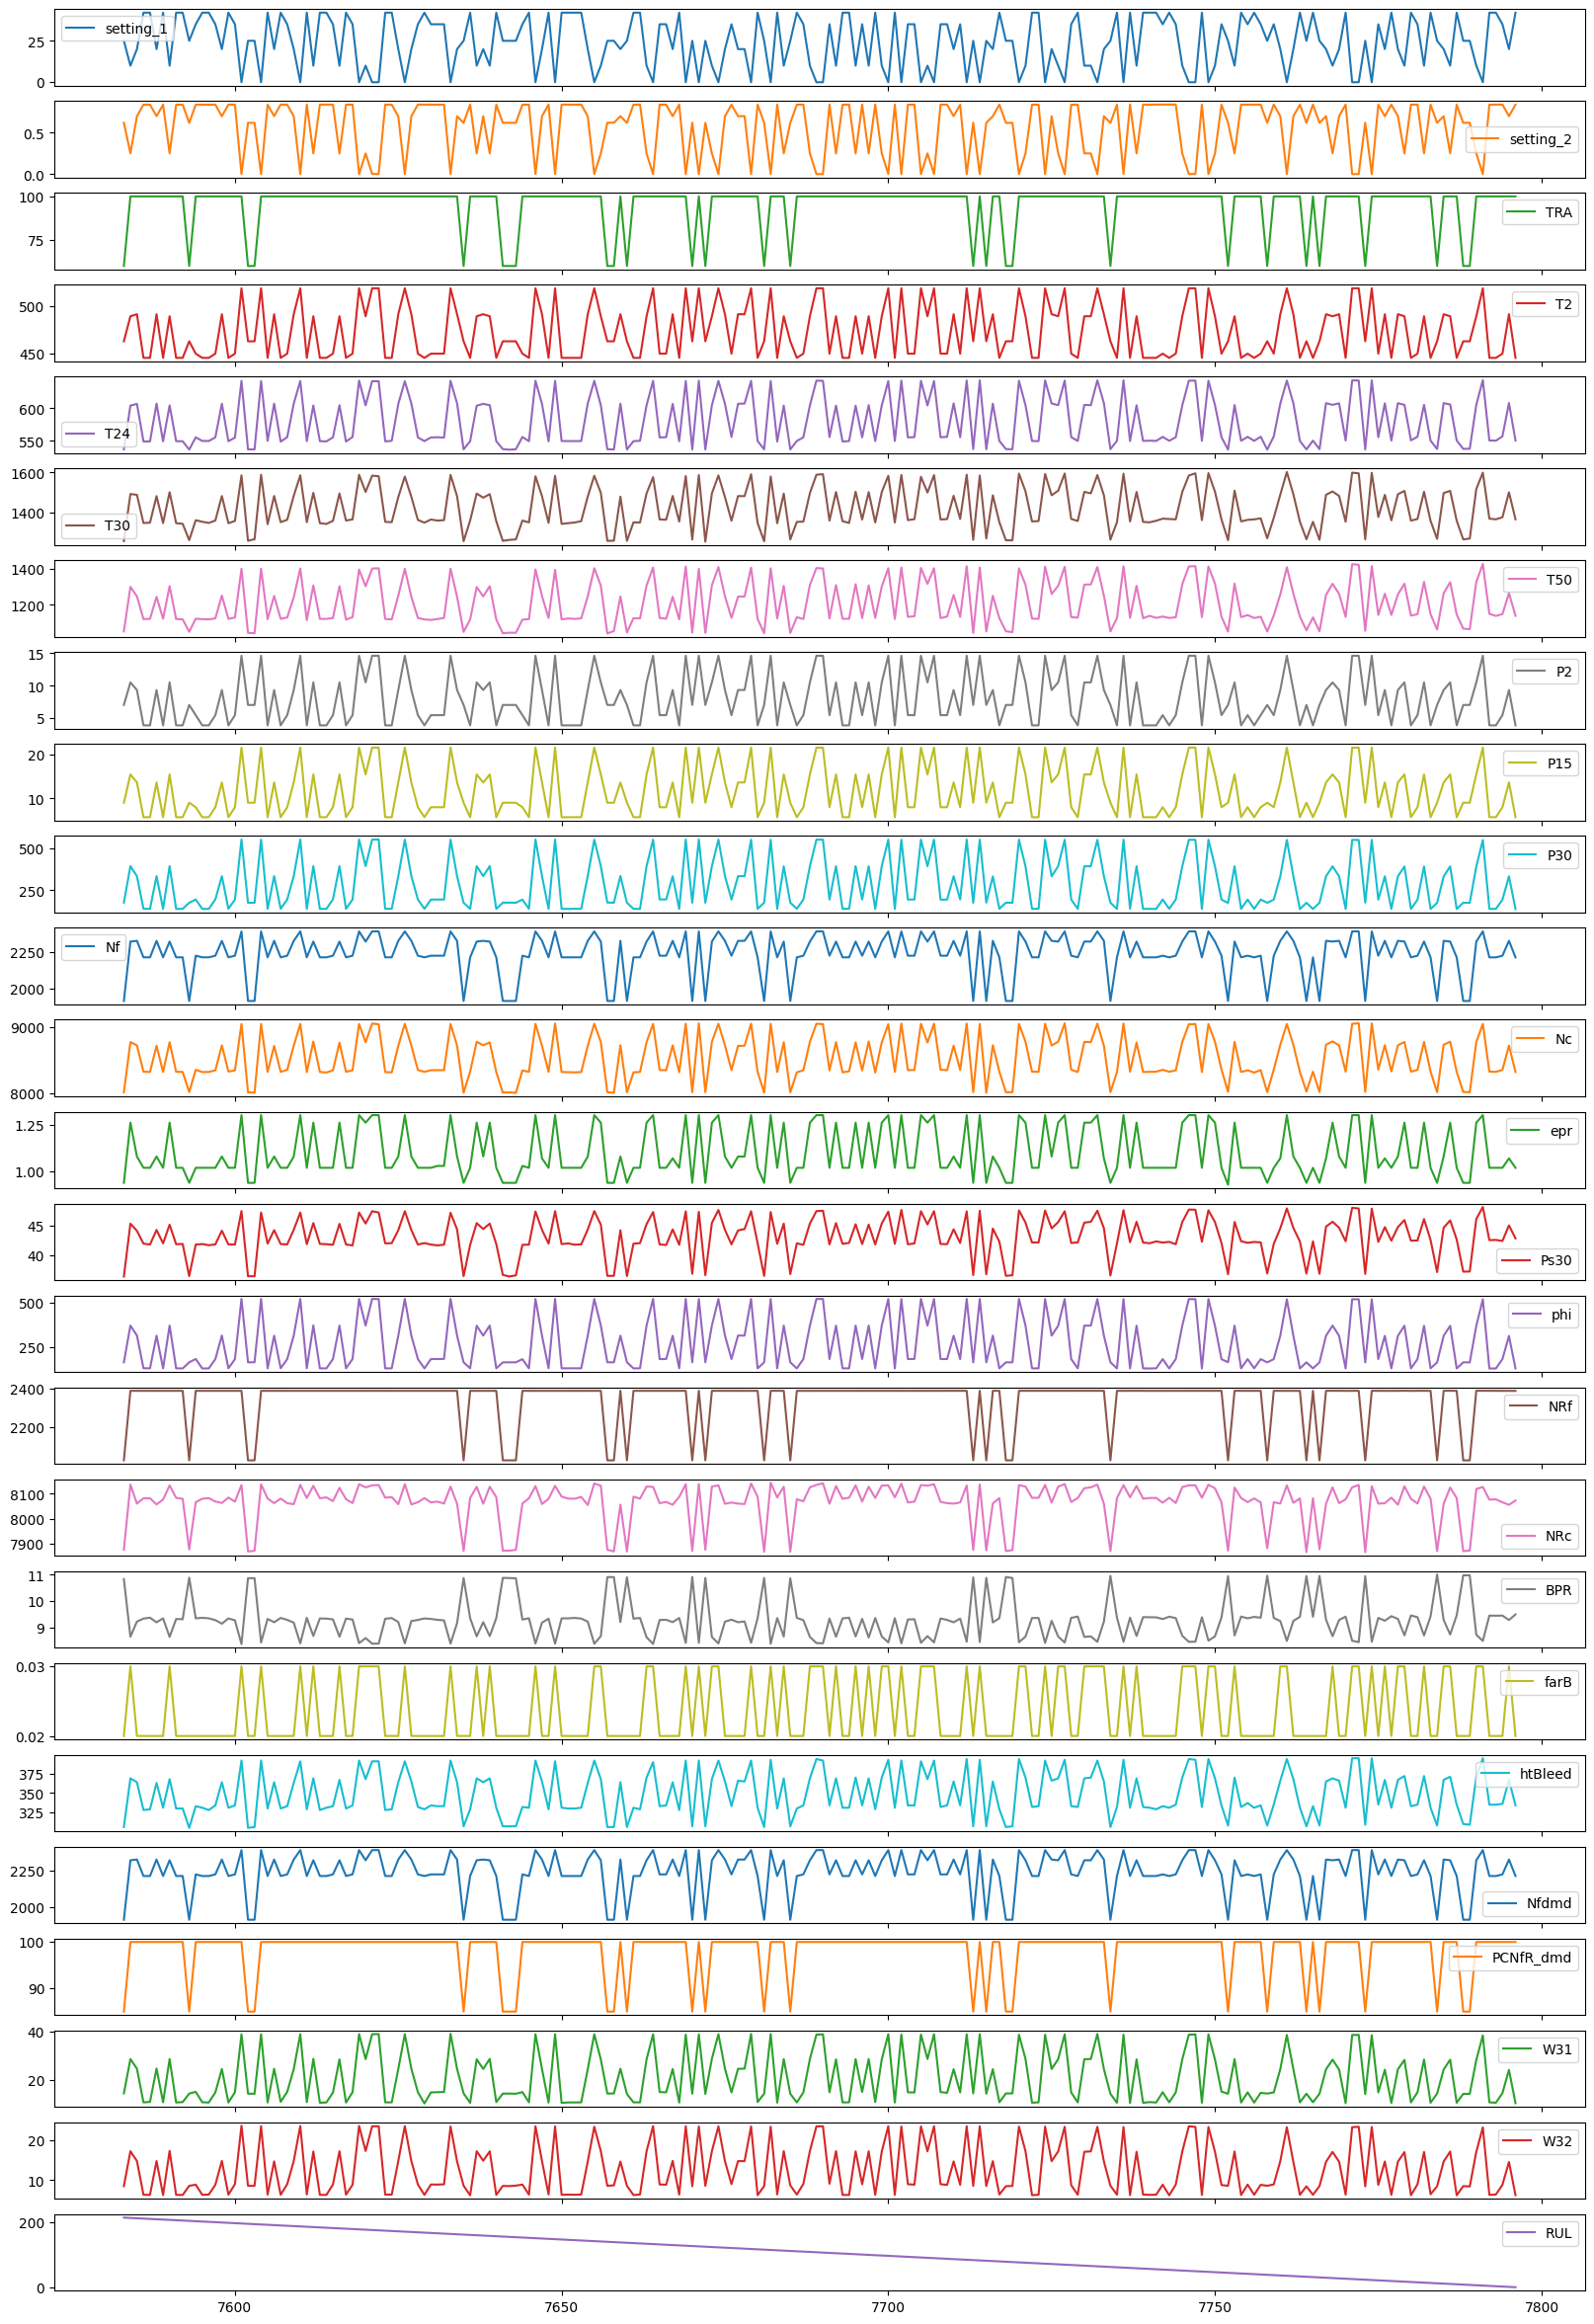

In [16]:
### Ver cada sensor por motor ###

# Filtramos los datos para obtener solo aquellos correspondientes al motor con 'unit_number' igual a 39.
engine_id = df[df['unit_number'] == 39]

# Graficamos todas las columnas (sensores) del DataFrame filtrado (excepto las dos primeras columnas) para el motor específico.
# Usamos subplots para crear un gráfico separado por cada sensor, compartiendo el eje x para todos los gráficos.
# Se define un tamaño de figura grande para asegurar que los gráficos sean legibles.
ax1 = engine_id[df.columns[2:]].plot(subplots=True, sharex=True, figsize=(20,30))

/tmp/ipython-input-17-199401640.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subset_stats.index, y=subset_stats["std"], palette='magma')
/tmp/ipython-input-17-199401640.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


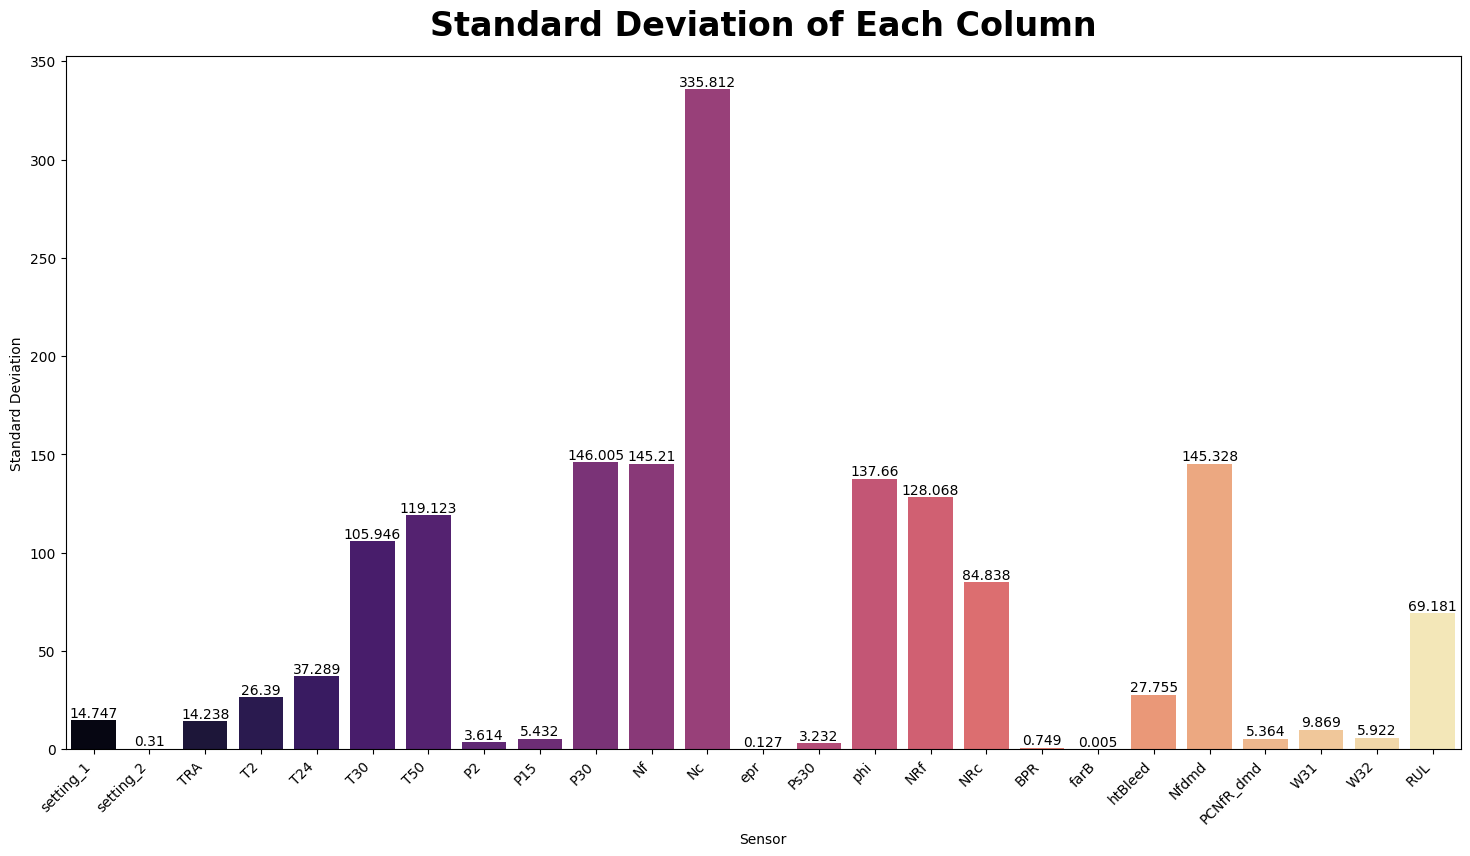

In [17]:
# Configuramos el tamaño de la figura para que sea lo suficientemente grande para visualizar todos los sensores.
plt.figure(figsize=(18, 9))

# Calculamos las estadísticas descriptivas (media y desviación estándar) de todas las columnas del DataFrame `df`.
# Usamos .loc[['mean', 'std']] para obtener solo las filas de la media y desviación estándar.
# La transponemos (.T) para que las columnas sean los sensores y filtramos desde la tercera columna en adelante [2:] para ignorar las dos primeras columnas que no corresponden a sensores.
subset_stats = df.describe().loc[['mean', 'std']].T[2:]

# Creamos un gráfico de barras para mostrar la desviación estándar de cada columna (sensor).
# Usamos la paleta 'magma' para dar color a las barras.
ax = sns.barplot(x=subset_stats.index, y=subset_stats["std"], palette='magma')

# Ajustamos las etiquetas del eje x (los nombres de los sensores) para que se roten 45 grados y se alineen a la derecha para mayor legibilidad.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Etiquetas de los ejes y título del gráfico
ax.set_xlabel("Sensor")
ax.set_ylabel("Standard Deviation")
ax.set_title("Standard Deviation of Each Column", fontweight='bold', fontsize=24, pad=15)

# Agregamos anotaciones a cada barra del gráfico, mostrando el valor de la desviación estándar con 3 decimales.
for p in ax.patches:
 ax.annotate(str(round(p.get_height(), 3)), # Texto que muestra la desviación estándar redondeada a 3 decimales
(p.get_x() + p.get_width() / 2., p.get_height()), # Posición del texto centrado sobre la barra
ha='center', va='center', fontsize=10, color='black', # Alineación y estilo del texto
xytext=(0, 5), textcoords='offset points') # Desplazamiento del texto hacia arriba de la barra

# Mostramos el gráfico
plt.show()

In [18]:
# Guardar en una carpeta específica de Drive (asegúrate de que exista)
df.to_csv('/content/drive/MyDrive/train_FD002_preprocessed.csv', index=False)
print("Archivo guardado en Google Drive")

Archivo guardado en Google Drive
